###Figure 7 from Nature Food Clark et al., 2023 

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import esmlab
#from ctsm_py import utils
#import segment as sg
import scipy                    
from scipy import signal
import cf_units as cf

# some resources for plotting
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline

from matplotlib.pyplot import figure
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import AutoMinorLocator

In [8]:
filedir = '/glade/p/univ/urtg0006/Brendan/clmcrop/yield/year2000/offline/'
savedir = '/glade/p/univ/urtg0006/Brendan/nature_food_pdf_figs/'

In [9]:
y45 = xr.open_dataset(filedir+'SSP245-AVG-COUP.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006-007.yield.2015-2070.nc')
y4515 = xr.open_dataset(filedir+'SSP245-15-AVG-COUP.b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006-007.clm2.h1.yield.203501-206912.nc')
#1st
y451 = xr.open_dataset(filedir+'SSP245-6-2000.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.clm2.h1.yield.2015-2070.nc')
y45151 = xr.open_dataset(filedir+'SSP245-15-6-2000.b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.006.clm2.h1.yield.203501-206912.nc')
#2nd
y452 = xr.open_dataset(filedir+'SSP245-7-2000.b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.yield.2015-2070.nc')
y45152 = xr.open_dataset(filedir+'SSP245-15-7-2000.b.e21.BW.f09_g17.SSP245-TSMLT-GAUSS-DEFAULT.007.clm2.h1.yield.203501-206912.nc')

In [10]:
T = xr.open_dataset(filedir+'temp-AVG-clm5.0.3_new-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006-007.temp.2060-2069.clm2.h1.yield.nc')
P = xr.open_dataset(filedir+'precip-AVG-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006-007.precip.2060-2069.clm2.h1.yield.nc')
H = xr.open_dataset(filedir+'humid-AVG-clm5.0.3_new-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006-007.humid.2060-2069.clm2.h1.yield.nc')
R = xr.open_dataset(filedir+'radcase1-AVG-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006-007.radcase1.2060-2069.clm2.h1.yield.nc')
rgeo = xr.open_dataset(filedir+'radcase2-AVG-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006-007.radcase2.2060-2069.clm2.h1.yield.nc')
SSP245 = xr.open_dataset(filedir+'SSP245-AVG-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006-007.2060-2069.clm2.h1.yield.nc')
#1st
T1 = xr.open_dataset(filedir+'temp006-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.temp.2060-2069.clm2.h1.yield.nc')
P1 = xr.open_dataset(filedir+'precip006-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.precip.2060-2069.clm2.h1.yield.nc')
H1 = xr.open_dataset(filedir+'humid006-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.humid.2060-2069.clm2.h1.yield.nc')
R1 = xr.open_dataset(filedir+'radcase1-006-clm5.0.3_new-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.radcase1.2060-2069.clm2.h1.yield.nc')
rgeo1 = xr.open_dataset(filedir+'radcase2-006-clm5.0.3_new-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.radcase2.2060-2069.clm2.h1.yield.nc')
SSP2451 = xr.open_dataset(filedir+'SSP245-006-clm5.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.006.h1.yield.2060-2069.nc')
#2nd
T2 = xr.open_dataset(filedir+'temp007-clm5.0.3_new-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.temp.2060-2069.clm2.h1.yield.nc')
P2 = xr.open_dataset(filedir+'precip007-2-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.precip.2060-2069.clm2.h1.yield.nc')
H2 = xr.open_dataset(filedir+'humid007-clm5.0.3_new-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.humid.2060-2069.clm2.h1.yield.nc')
R2 = xr.open_dataset(filedir+'radcase1-007-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.radcase1.2060-2069.clm2.h1.yield.nc')
rgeo2 = xr.open_dataset(filedir+'radcase2-007-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.radcase2.2060-2069.clm2.h1.yield.nc')
SSP2452 = xr.open_dataset(filedir+'SSP245-007-clm5.0.3-b.e21.BWSSP245cmip6.f09_g17.CMIP6-SSP2-4.5-WACCM.007.2060-2069.clm2.h1.yield.nc')

In [11]:
carea = y45['area'].sel(crops=0)
cornarea = carea * 100
rarea = y45['area'].sel(crops=3)
ricearea = rarea * 100
sarea = y45['area'].sel(crops=6)
soyarea = sarea * 100
warea = y45['area'].sel(crops=9)
wheatarea = warea * 100

In [12]:
y45 = y45.sel(time=slice('2061-02-01', '2070-01-01'))
y4515 = y4515.sel(time=slice('2061-02-01', '2070-01-01'))
y451 = y451.sel(time=slice('2061-02-01', '2070-01-01'))
y45151 = y45151.sel(time=slice('2061-02-01', '2070-01-01'))
y452 = y452.sel(time=slice('2061-02-01', '2070-01-01'))
y45152 = y45152.sel(time=slice('2061-02-01', '2070-01-01'))

T = T.sel(time=slice('2061-02-01', '2070-01-01'))
P = P.sel(time=slice('2061-02-01', '2070-01-01'))
H = H.sel(time=slice('2061-02-01', '2070-01-01'))
R = R.sel(time=slice('2061-02-01', '2070-01-01'))
rgeo = rgeo.sel(time=slice('2061-02-01', '2070-01-01'))
SSP245 = SSP245.sel(time=slice('2061-02-01', '2070-01-01'))

T1 = T1.sel(time=slice('2061-02-01', '2070-01-01'))
P1 = P1.sel(time=slice('2061-02-01', '2070-01-01'))
H1 = H1.sel(time=slice('2061-02-01', '2070-01-01'))
R1 = R1.sel(time=slice('2061-02-01', '2070-01-01'))
rgeo1 = rgeo1.sel(time=slice('2061-02-01', '2070-01-01'))
SSP2451 = SSP2451.sel(time=slice('2061-02-01', '2070-01-01'))

T2 = T2.sel(time=slice('2061-02-01', '2070-01-01'))
P2 = P2.sel(time=slice('2061-02-01', '2070-01-01'))
H2 = H2.sel(time=slice('2061-02-01', '2070-01-01'))
R2 = R2.sel(time=slice('2061-02-01', '2070-01-01'))
rgeo2 = rgeo2.sel(time=slice('2061-02-01', '2070-01-01'))
SSP2452 = SSP2452.sel(time=slice('2061-02-01', '2070-01-01'))

In [13]:
#SSP245
c45C = y45['yield'].sel(crops=0)
c45C = c45C * cornarea
c45C = c45C.sum(dim=['lat','lon'],skipna=True)
c45C1 = y451['yield'].sel(crops=0)
c45C1 = c45C1 * cornarea
c45C1 = c45C1.sum(dim=['lat','lon'],skipna=True)
c45C2 = y452['yield'].sel(crops=0)
c45C2 = c45C2 * cornarea
c45C2 = c45C2.sum(dim=['lat','lon'],skipna=True)

r45C = y45['yield'].sel(crops=3)
r45C = r45C * ricearea
r45C = r45C.sum(dim=['lat','lon'],skipna=True)
r45C1 = y451['yield'].sel(crops=3)
r45C1 = r45C1 * ricearea
r45C1 = r45C1.sum(dim=['lat','lon'],skipna=True)
r45C2 = y452['yield'].sel(crops=3)
r45C2 = r45C2 * ricearea
r45C2 = r45C2.sum(dim=['lat','lon'],skipna=True)

s45C = y45['yield'].sel(crops=6)
s45C = s45C * soyarea
s45C = s45C.sum(dim=['lat','lon'],skipna=True)
s45C1 = y451['yield'].sel(crops=6)
s45C1 = s45C1 * soyarea
s45C1 = s45C1.sum(dim=['lat','lon'],skipna=True)
s45C2 = y452['yield'].sel(crops=6)
s45C2 = s45C2 * soyarea
s45C2 = s45C2.sum(dim=['lat','lon'],skipna=True)

w45C = y45['yield'].sel(crops=9)
w45C = w45C * wheatarea
w45C = w45C.sum(dim=['lat','lon'],skipna=True)
w45C1 = y451['yield'].sel(crops=9)
w45C1 = w45C1 * wheatarea
w45C1 = w45C1.sum(dim=['lat','lon'],skipna=True)
w45C2 = y452['yield'].sel(crops=9)
w45C2 = w45C2 * wheatarea
w45C2 = w45C2.sum(dim=['lat','lon'],skipna=True)

#SSP245-15
c4515C = y4515['yield'].sel(crops=0)
c4515C = c4515C * cornarea
c4515C = c4515C.sum(dim=['lat','lon'],skipna=True)
c4515C1 = y45151['yield'].sel(crops=0)
c4515C1 = c4515C1 * cornarea
c4515C1 = c4515C1.sum(dim=['lat','lon'],skipna=True)
c4515C2 = y45152['yield'].sel(crops=0)
c4515C2 = c4515C2 * cornarea
c4515C2 = c4515C2.sum(dim=['lat','lon'],skipna=True)

r4515C = y4515['yield'].sel(crops=3)
r4515C = r4515C * ricearea
r4515C = r4515C.sum(dim=['lat','lon'],skipna=True)
r4515C1 = y45151['yield'].sel(crops=3)
r4515C1 = r4515C1 * ricearea
r4515C1 = r4515C1.sum(dim=['lat','lon'],skipna=True)
r4515C2 = y45152['yield'].sel(crops=3)
r4515C2 = r4515C2 * ricearea
r4515C2 = r4515C2.sum(dim=['lat','lon'],skipna=True)

s4515C = y4515['yield'].sel(crops=6)
s4515C = s4515C * soyarea
s4515C = s4515C.sum(dim=['lat','lon'],skipna=True)
s4515C1 = y45151['yield'].sel(crops=6)
s4515C1 = s4515C1 * soyarea
s4515C1 = s4515C1.sum(dim=['lat','lon'],skipna=True)
s4515C2 = y45152['yield'].sel(crops=6)
s4515C2 = s4515C2 * soyarea
s4515C2 = s4515C2.sum(dim=['lat','lon'],skipna=True)

w4515C = y4515['yield'].sel(crops=9)
w4515C = w4515C * wheatarea
w4515C = w4515C.sum(dim=['lat','lon'],skipna=True)
w4515C1 = y45151['yield'].sel(crops=9)
w4515C1 = w4515C1 * wheatarea
w4515C1 = w4515C1.sum(dim=['lat','lon'],skipna=True)
w4515C2 = y45152['yield'].sel(crops=9)
w4515C2 = w4515C2 * wheatarea
w4515C2 = w4515C2.sum(dim=['lat','lon'],skipna=True)

In [14]:
#Maize
c45 = SSP245['yield'].sel(crops=0)
c45 = c45 * cornarea
c45 = c45.sum(dim=['lat','lon'],skipna=True)
c451 = SSP2451['yield'].sel(crops=0)
c451 = c451 * cornarea
c451 = c451.sum(dim=['lat','lon'],skipna=True)
c452 = SSP2452['yield'].sel(crops=0)
c452 = c452 * cornarea
c452 = c452.sum(dim=['lat','lon'],skipna=True)

ct = T['yield'].sel(crops=0)
ct = ct * cornarea
ct = ct.sum(dim=['lat','lon'],skipna=True)
ct1 = T1['yield'].sel(crops=0)
ct1 = ct1 * cornarea
ct1 = ct1.sum(dim=['lat','lon'],skipna=True)
ct2 = T2['yield'].sel(crops=0)
ct2 = ct2 * cornarea
ct2 = ct2.sum(dim=['lat','lon'],skipna=True)

cp = P['yield'].sel(crops=0)
cp = cp * cornarea
cp = cp.sum(dim=['lat','lon'],skipna=True)
cp1 = P1['yield'].sel(crops=0)
cp1 = cp1 * cornarea
cp1 = cp1.sum(dim=['lat','lon'],skipna=True)
cp2 = P2['yield'].sel(crops=0)
cp2 = cp2 * cornarea
cp2 = cp2.sum(dim=['lat','lon'],skipna=True)

ch = H['yield'].sel(crops=0)
ch = ch * cornarea
ch = ch.sum(dim=['lat','lon'],skipna=True)
ch1 = H1['yield'].sel(crops=0)
ch1 = ch1 * cornarea
ch1 = ch1.sum(dim=['lat','lon'],skipna=True)
ch2 = H2['yield'].sel(crops=0)
ch2 = ch2 * cornarea
ch2 = ch2.sum(dim=['lat','lon'],skipna=True)

cr = R['yield'].sel(crops=0)
cr = cr * cornarea
cr = cr.sum(dim=['lat','lon'],skipna=True)
cr1 = R1['yield'].sel(crops=0)
cr1 = cr1 * cornarea
cr1 = cr1.sum(dim=['lat','lon'],skipna=True)
cr2 = R2['yield'].sel(crops=0)
cr2 = cr2 * cornarea
cr2 = cr2.sum(dim=['lat','lon'],skipna=True)

crg = rgeo['yield'].sel(crops=0)
crg = crg * cornarea
crg = crg.sum(dim=['lat','lon'],skipna=True)
crg1 = rgeo1['yield'].sel(crops=0)
crg1 = crg1 * cornarea
crg1 = crg1.sum(dim=['lat','lon'],skipna=True)
crg2 = rgeo2['yield'].sel(crops=0)
crg2 = crg2 * cornarea
crg2 = crg2.sum(dim=['lat','lon'],skipna=True)

In [15]:
#Rice
r45 = SSP245['yield'].sel(crops=3)
r45 = r45 * ricearea
r45 = r45.sum(dim=['lat','lon'],skipna=True)
r451 = SSP2451['yield'].sel(crops=3)
r451 = r451 * ricearea
r451 = r451.sum(dim=['lat','lon'],skipna=True)
r452 = SSP2452['yield'].sel(crops=3)
r452 = r452 * ricearea
r452 = r452.sum(dim=['lat','lon'],skipna=True)

rt = T['yield'].sel(crops=3)
rt = rt * ricearea
rt = rt.sum(dim=['lat','lon'],skipna=True)
rt1 = T1['yield'].sel(crops=3)
rt1 = rt1 * ricearea
rt1 = rt1.sum(dim=['lat','lon'],skipna=True)
rt2 = T2['yield'].sel(crops=3)
rt2 = rt2 * ricearea
rt2 = rt2.sum(dim=['lat','lon'],skipna=True)

rp = P['yield'].sel(crops=3)
rp = rp * ricearea
rp = rp.sum(dim=['lat','lon'],skipna=True)
rp1 = P1['yield'].sel(crops=3)
rp1 = rp1 * ricearea
rp1 = rp1.sum(dim=['lat','lon'],skipna=True)
rp2 = P2['yield'].sel(crops=3)
rp2 = rp2 * ricearea
rp2 = rp2.sum(dim=['lat','lon'],skipna=True)

rh = H['yield'].sel(crops=3)
rh = rh * ricearea
rh = rh.sum(dim=['lat','lon'],skipna=True)
rh1 = H1['yield'].sel(crops=3)
rh1 = rh1 * ricearea
rh1 = rh1.sum(dim=['lat','lon'],skipna=True)
rh2 = H2['yield'].sel(crops=3)
rh2 = rh2 * ricearea
rh2 = rh2.sum(dim=['lat','lon'],skipna=True)

rr = R['yield'].sel(crops=3)
rr = rr * ricearea
rr = rr.sum(dim=['lat','lon'],skipna=True)
rr1 = R1['yield'].sel(crops=3)
rr1 = rr1 * ricearea
rr1 = rr1.sum(dim=['lat','lon'],skipna=True)
rr2 = R2['yield'].sel(crops=3)
rr2 = rr2 * ricearea
rr2 = rr2.sum(dim=['lat','lon'],skipna=True)

rrg = rgeo['yield'].sel(crops=3)
rrg = rrg * ricearea
rrg = rrg.sum(dim=['lat','lon'],skipna=True)
rrg1 = rgeo1['yield'].sel(crops=3)
rrg1 = rrg1 * ricearea
rrg1 = rrg1.sum(dim=['lat','lon'],skipna=True)
rrg2 = rgeo2['yield'].sel(crops=3)
rrg2 = rrg2 * ricearea
rrg2 = rrg2.sum(dim=['lat','lon'],skipna=True)

In [16]:
#Soy
s45 = SSP245['yield'].sel(crops=6)
s45 = s45 * soyarea
s45 = s45.sum(dim=['lat','lon'],skipna=True)
s451 = SSP2451['yield'].sel(crops=6)
s451 = s451 * soyarea
s451 = s451.sum(dim=['lat','lon'],skipna=True)
s452 = SSP2452['yield'].sel(crops=6)
s452 = s452 * soyarea
s452 = s452.sum(dim=['lat','lon'],skipna=True)

st = T['yield'].sel(crops=6)
st = st * soyarea
st = st.sum(dim=['lat','lon'],skipna=True)
st1 = T1['yield'].sel(crops=6)
st1 = st1 * soyarea
st1 = st1.sum(dim=['lat','lon'],skipna=True)
st2 = T2['yield'].sel(crops=6)
st2 = st2 * soyarea
st2 = st2.sum(dim=['lat','lon'],skipna=True)

sp = P['yield'].sel(crops=6)
sp = sp * soyarea
sp = sp.sum(dim=['lat','lon'],skipna=True)
sp1 = P1['yield'].sel(crops=6)
sp1 = sp1 * soyarea
sp1 = sp1.sum(dim=['lat','lon'],skipna=True)
sp2 = P2['yield'].sel(crops=6)
sp2 = sp2 * soyarea
sp2 = sp2.sum(dim=['lat','lon'],skipna=True)

sh = H['yield'].sel(crops=6)
sh = sh * soyarea
sh = sh.sum(dim=['lat','lon'],skipna=True)
sh1 = H1['yield'].sel(crops=6)
sh1 = sh1 * soyarea
sh1 = sh1.sum(dim=['lat','lon'],skipna=True)
sh2 = H2['yield'].sel(crops=6)
sh2 = sh2 * soyarea
sh2 = sh2.sum(dim=['lat','lon'],skipna=True)

sr = R['yield'].sel(crops=6)
sr = sr * soyarea
sr = sr.sum(dim=['lat','lon'],skipna=True)
sr1 = R1['yield'].sel(crops=6)
sr1 = sr1 * soyarea
sr1 = sr1.sum(dim=['lat','lon'],skipna=True)
sr2 = R2['yield'].sel(crops=6)
sr2 = sr2 * soyarea
sr2 = sr2.sum(dim=['lat','lon'],skipna=True)

srg = rgeo['yield'].sel(crops=6)
srg = srg * soyarea
srg = srg.sum(dim=['lat','lon'],skipna=True)
srg1 = rgeo1['yield'].sel(crops=6)
srg1 = srg1 * soyarea
srg1 = srg1.sum(dim=['lat','lon'],skipna=True)
srg2 = rgeo2['yield'].sel(crops=6)
srg2 = srg2 * soyarea
srg2 = srg2.sum(dim=['lat','lon'],skipna=True)

In [17]:
#Wheat
w45 = SSP245['yield'].sel(crops=9)
w45 = w45 * wheatarea
w45 = w45.sum(dim=['lat','lon'],skipna=True)
w451 = SSP2451['yield'].sel(crops=9)
w451 = w451 * wheatarea
w451 = w451.sum(dim=['lat','lon'],skipna=True)
w452 = SSP2452['yield'].sel(crops=9)
w452 = w452 * wheatarea
w452 = w452.sum(dim=['lat','lon'],skipna=True)

wt = T['yield'].sel(crops=9)
wt = wt * wheatarea
wt = wt.sum(dim=['lat','lon'],skipna=True)
wt1 = T1['yield'].sel(crops=9)
wt1 = wt1 * wheatarea
wt1 = wt1.sum(dim=['lat','lon'],skipna=True)
wt2 = T2['yield'].sel(crops=9)
wt2 = wt2 * wheatarea
wt2 = wt2.sum(dim=['lat','lon'],skipna=True)

wp = P['yield'].sel(crops=9)
wp = wp * wheatarea
wp = wp.sum(dim=['lat','lon'],skipna=True)
wp1 = P1['yield'].sel(crops=9)
wp1 = wp1 * wheatarea
wp1 = wp1.sum(dim=['lat','lon'],skipna=True)
wp2 = P2['yield'].sel(crops=9)
wp2 = wp2 * wheatarea
wp2 = wp2.sum(dim=['lat','lon'],skipna=True)

wh = H['yield'].sel(crops=9)
wh = wh * wheatarea
wh = wh.sum(dim=['lat','lon'],skipna=True)
wh1 = H1['yield'].sel(crops=9)
wh1 = wh1 * wheatarea
wh1 = wh1.sum(dim=['lat','lon'],skipna=True)
wh2 = H2['yield'].sel(crops=9)
wh2 = wh2 * wheatarea
wh2 = wh2.sum(dim=['lat','lon'],skipna=True)

wr = R['yield'].sel(crops=9)
wr = wr * wheatarea
wr = wr.sum(dim=['lat','lon'],skipna=True)
wr1 = R1['yield'].sel(crops=9)
wr1 = wr1 * wheatarea
wr1 = wr1.sum(dim=['lat','lon'],skipna=True)
wr2 = R2['yield'].sel(crops=9)
wr2 = wr2 * wheatarea
wr2 = wr2.sum(dim=['lat','lon'],skipna=True)

wrg = rgeo['yield'].sel(crops=9)
wrg = wrg * wheatarea
wrg = wrg.sum(dim=['lat','lon'],skipna=True)
wrg1 = rgeo1['yield'].sel(crops=9)
wrg1 = wrg1 * wheatarea
wrg1 = wrg1.sum(dim=['lat','lon'],skipna=True)
wrg2 = rgeo2['yield'].sel(crops=9)
wrg2 = wrg2 * wheatarea
wrg2 = wrg2.sum(dim=['lat','lon'],skipna=True)

In [18]:
#total
c_tot = (c4515C - c45C) / (c45C)
c_tot = c_tot * 100
c_totm = c_tot.mean()
c_tot1 = (c4515C1 - c45C1) / (c45C1)
c_tot1 = c_tot1 * 100
c_totm1 = c_tot1.mean()
c_tot2 = (c4515C2 - c45C2) / (c45C2)
c_tot2 = c_tot2 * 100
c_totm2 = c_tot2.mean()

r_tot = (r4515C - r45C) / (r45C)
r_tot = r_tot * 100
r_totm = r_tot.mean()
r_tot1 = (r4515C1 - r45C1) / (r45C1)
r_tot1 = r_tot1 * 100
r_totm1 = r_tot1.mean()
r_tot2 = (r4515C2 - r45C2) / (r45C2)
r_tot2 = r_tot2 * 100
r_totm2 = r_tot2.mean()

s_tot = (s4515C - s45C) / (s45C)
s_tot = s_tot * 100
s_totm = s_tot.mean()
s_tot1 = (s4515C1 - s45C1) / (s45C1)
s_tot1 = s_tot1 * 100
s_totm1 = s_tot1.mean()
s_tot2 = (s4515C2 - s45C2) / (s45C2)
s_tot2 = s_tot2 * 100
s_totm2 = s_tot2.mean()

w_tot = (w4515C - w45C) / (w45C)
w_tot = w_tot * 100
w_totm = w_tot.mean()
w_tot1 = (w4515C1 - w45C1) / (w45C1)
w_tot1 = w_tot1 * 100
w_totm1 = w_tot1.mean()
w_tot2 = (w4515C2 - w45C2) / (w45C2)
w_tot2 = w_tot2 * 100
w_totm2 = w_tot2.mean()

#temp
ct_change = (ct - c45) / (c45)
ct_change = ct_change * 100
ct_changem = ct_change.mean()
ct_change1 = (ct1 - c451) / (c451)
ct_change1 = ct_change1 * 100
ct_changem1 = ct_change1.mean()
ct_change2 = (ct2 - c452) / (c452)
ct_change2 = ct_change2 * 100
ct_changem2 = ct_change2.mean()

rt_change = (rt - r45) / (r45)
rt_change = rt_change * 100
rt_changem = rt_change.mean()
rt_change1 = (rt1 - r451) / (r451)
rt_change1 = rt_change1 * 100
rt_changem1 = rt_change1.mean()
rt_change2 = (rt2 - r452) / (r452)
rt_change2 = rt_change2 * 100
rt_changem2 = rt_change2.mean()

st_change = (st - s45) / (s45)
st_change = st_change * 100
st_changem = st_change.mean()
st_change1 = (st1 - s451) / (s451)
st_change1 = st_change1 * 100
st_changem1 = st_change1.mean()
st_change2 = (st2 - s452) / (s452)
st_change2 = st_change2 * 100
st_changem2 = st_change2.mean()

wt_change = (wt - w45) / (w45)
wt_change = wt_change * 100
wt_changem = wt_change.mean()
wt_change1 = (wt1 - w451) / (w451)
wt_change1 = wt_change1 * 100
wt_changem1 = wt_change1.mean()
wt_change2 = (wt2 - w452) / (w452)
wt_change2 = wt_change2 * 100
wt_changem2 = wt_change2.mean()

#Precip
cp_change = (cp - c45) / (c45)
cp_change = cp_change * 100
cp_changem = cp_change.mean()
cp_change1 = (cp1 - c451) / (c451)
cp_change1 = cp_change1 * 100
cp_changem1 = cp_change1.mean()
cp_change2 = (cp2 - c452) / (c452)
cp_change2 = cp_change2 * 100
cp_changem2 = cp_change2.mean()

rp_change = (rp - r45) / (r45)
rp_change = rp_change * 100
rp_changem = rp_change.mean()
rp_change1 = (rp1 - r451) / (r451)
rp_change1 = rp_change1 * 100
rp_changem1 = rp_change1.mean()
rp_change2 = (rp2 - r452) / (r452)
rp_change2 = rp_change2 * 100
rp_changem2 = rp_change2.mean()

sp_change = (sp - s45) / (s45)
sp_change = sp_change * 100
sp_changem = sp_change.mean()
sp_change1 = (sp1 - s451) / (s451)
sp_change1 = sp_change1 * 100
sp_changem1 = sp_change1.mean()
sp_change2 = (sp2 - s452) / (s452)
sp_change2 = sp_change2 * 100
sp_changem2 = sp_change2.mean()

wp_change = (wp - w45) / (w45)
wp_change = wp_change * 100
wp_changem = wp_change.mean()
wp_change1 = (wp1 - w451) / (w451)
wp_change1 = wp_change1 * 100
wp_changem1 = wp_change1.mean()
wp_change1 = (wp1 - w451) / (w451)
wp_change1 = wp_change1 * 100
wp_changem1 = wp_change1.mean()
wp_change2 = (wp2 - w452) / (w452)
wp_change2 = wp_change2 * 100
wp_changem2 = wp_change2.mean()

#Humidity
ch_change = (ch - c45) / (c45)
ch_change = ch_change * 100
ch_changem = ch_change.mean()
ch_change1 = (ch1 - c451) / (c451)
ch_change1 = ch_change1 * 100
ch_changem1 = ch_change1.mean()
ch_change2 = (ch2 - c452) / (c452)
ch_change2 = ch_change2 * 100
ch_changem2 = ch_change2.mean()

rh_change = (rh - r45) / (r45)
rh_change = rh_change * 100
rh_changem = rh_change.mean()
rh_change1 = (rh1 - r451) / (r451)
rh_change1 = rh_change1 * 100
rh_changem1 = rh_change1.mean()
rh_change2 = (rh2 - r452) / (r452)
rh_change2 = rh_change2 * 100
rh_changem2 = rh_change2.mean()

sh_change = (sh - s45) / (s45)
sh_change = sh_change * 100
sh_changem = sh_change.mean()
sh_change1 = (sh1 - s451) / (s451)
sh_change1 = sh_change1 * 100
sh_changem1 = sh_change1.mean()
sh_change2 = (sh2 - s452) / (s452)
sh_change2 = sh_change2 * 100
sh_changem2 = sh_change2.mean()

wh_change = (wh - w45) / (w45)
wh_change = wh_change * 100
wh_changem = wh_change.mean()
wh_change1 = (wh1 - w451) / (w451)
wh_change1 = wh_change1 * 100
wh_changem1 = wh_change1.mean()
wh_change2 = (wh2 - w452) / (w452)
wh_change2 = wh_change2 * 100
wh_changem2 = wh_change2.mean()

#ratio change
cratio_change = (crg - cr) / (cr)
cratio_change = cratio_change * 100
cratio_changem = cratio_change.mean()
cratio_change1 = (crg1 - cr1) / (cr1)
cratio_change1 = cratio_change1 * 100
cratio_changem1 = cratio_change1.mean()
cratio_change2 = (crg2 - cr2) / (cr2)
cratio_change2 = cratio_change2 * 100
cratio_changem2 = cratio_change2.mean()

rratio_change = (rrg - rr) / (rr)
rratio_change = rratio_change * 100
rratio_changem = rratio_change.mean()
rratio_change1 = (rrg1 - rr1) / (rr1)
rratio_change1 = rratio_change1 * 100
rratio_changem1 = rratio_change1.mean()
rratio_change2 = (rrg2 - rr2) / (rr2)
rratio_change2 = rratio_change2 * 100
rratio_changem2 = rratio_change2.mean()

sratio_change = (srg - sr) / (sr)
sratio_change = sratio_change * 100
sratio_changem = sratio_change.mean()
sratio_change1 = (srg1 - sr1) / (sr1)
sratio_change1 = sratio_change1 * 100
sratio_changem1 = sratio_change1.mean()
sratio_change2 = (srg2 - sr2) / (sr2)
sratio_change2 = sratio_change2 * 100
sratio_changem2 = sratio_change2.mean()

wratio_change = (wrg - wr) / (wr)
wratio_change = wratio_change * 100
wratio_changem = wratio_change.mean()
wratio_change1 = (wrg1 - wr1) / (wr1)
wratio_change1 = wratio_change1 * 100
wratio_changem1 = wratio_change1.mean()
wratio_change2 = (wrg2 - wr2) / (wr2)
wratio_change2 = wratio_change2 * 100
wratio_changem2 = wratio_change2.mean()

#Tot rad
crad_tot = (cr - c45) / (c45)
crad_tot = crad_tot * 100
crad_totm = crad_tot.mean()
crad_tot1 = (cr1 - c451) / (c451)
crad_tot1 = crad_tot1 * 100
crad_totm1 = crad_tot1.mean()
crad_tot2 = (cr2 - c452) / (c452)
crad_tot2 = crad_tot2 * 100
crad_totm2 = crad_tot2.mean()

rrad_tot = (rr - r45) / (r45)
rrad_tot = rrad_tot * 100
rrad_totm = rrad_tot.mean()
rrad_tot1 = (rr1 - r451) / (r451)
rrad_tot1 = rrad_tot1 * 100
rrad_totm1 = rrad_tot1.mean()
rrad_tot2 = (rr2 - r452) / (r452)
rrad_tot2 = rrad_tot2 * 100
rrad_totm2 = rrad_tot2.mean()

srad_tot = (sr - s45) / (s45)
srad_tot = srad_tot * 100
srad_totm = srad_tot.mean()
srad_tot1 = (sr1 - s451) / (s451)
srad_tot1 = srad_tot1 * 100
srad_totm1 = srad_tot1.mean()
srad_tot2 = (sr2 - s452) / (s452)
srad_tot2 = srad_tot2 * 100
srad_totm2 = srad_tot2.mean()

wrad_tot = (wr - w45) / (w45)
wrad_tot = wrad_tot * 100
wrad_totm = wrad_tot.mean()
wrad_tot1 = (wr1 - w451) / (w451)
wrad_tot1 = wrad_tot1 * 100
wrad_totm1 = wrad_tot1.mean()
wrad_tot2 = (wr2 - w452) / (w452)
wrad_tot2 = wrad_tot2 * 100
wrad_totm2 = wrad_tot2.mean()

In [ ]:
ct_change1

In [13]:
#fig = plt.figure()
#fig.set_size_inches(15,10)
#ax1 = fig.add_subplot(221)
time4515 = np.linspace(2060, 2070, 10)
#ax1.plot(time4515,st_change,label="Temp",linewidth=2)
#ax1.plot(time4515,sp_change,label="Precip",linewidth=2)
#ax1.plot(time4515,sh_change,label="Humid",linewidth=2)
#ax1.plot(time4515,sratio_change,label="Dir/Dif",linewidth=2)
#ax1.plot(time4515,srad_tot,label="Tot Rad",linewidth=2)
#ax1.plot(time4515,s_tot,label="Total",linewidth=2)
#ax1.grid()
#ax1.legend(loc="upper left", prop={'size': 11})
#ax1.set_ylabel('Global Production Change (%)')
#ax1.set_ylim([7.5e8, 11e8])
#ax1.ticklabel_format(style='sci', axis='y', scilimits=(8,8))
#ax1.title.set_text('Soybean')

In [19]:
maize = [ct_changem, cp_changem, ch_changem, cratio_changem, crad_totm, c_totm]
rice = [rt_changem, rp_changem, rh_changem, rratio_changem, rrad_totm, r_totm]
soy = [st_changem, sp_changem, sh_changem, sratio_changem, srad_totm, s_totm]
wheat = [wt_changem, wp_changem, wh_changem, wratio_changem, wrad_totm, w_totm]

In [81]:
w_totm2

<xarray.DataArray ()>
array(5.729849)
Coordinates:
    crops    float64 9.0
Attributes:
    units:    ton/ha/yr

In [20]:
loerm=np.array([9.3,-0.57,-0.99,0.29,-0.25,8.99])
yminm = maize - loerm
uperm=np.array([10.57,0.38,-0.007,1.39,-0.15,11.38]) 
ymaxm = uperm - maize

loerr=np.array([5.4,0.5,-0.89,-0.07,-0.6,7.85])
yminr = rice - loerr
uperr=np.array([6.7,2.8,-1.07,0.54,-0.11,8.8]) 
ymaxr = uperr - rice

loers=np.array([18.1,-5.9,-0.38,2.4,0.3,9.2])
ymins = soy - loers
upers=np.array([28,-5.3,2.3,3.4,0.9,27.5]) 
ymaxs = upers - soy

loerw=np.array([10,-2.99,1.88,0.7,-0.22,5.7])
yminw = wheat - loerw
uperw=np.array([10.2,-0.9,3.6,1.66,-0.097,9.1]) 
ymaxw = uperw - wheat

In [21]:
N = 6
ind = np.arange(N)
barWidth = 0.2

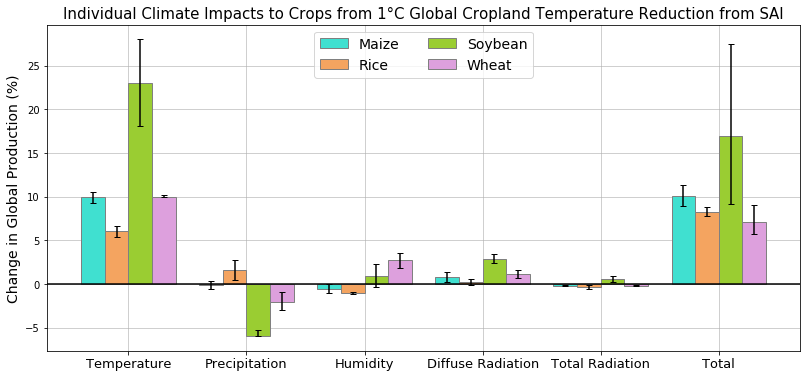

In [22]:
fig = plt.subplots(figsize =(13.5, 6))
plt.grid(linewidth=0.6, zorder=0)
plt.bar(ind, maize, width = barWidth, color ='turquoise',
        edgecolor ='grey', label ='Maize', zorder=2)
plt.errorbar(ind, maize, yerr=(yminm, ymaxm), fmt='o',marker='None', ecolor='black',capsize=3,zorder=3)
plt.bar(ind + barWidth, rice, color ='sandybrown', width = barWidth,
        edgecolor ='grey', label ='Rice', zorder=2)
plt.errorbar(ind + barWidth, rice, yerr=(yminr, ymaxr), fmt='o',marker='None', ecolor='black',capsize=3,zorder=3)
plt.bar(ind + barWidth + barWidth, soy, color ='yellowgreen', width = barWidth,
        edgecolor ='grey', label ='Soybean', zorder=2)
plt.errorbar(ind + barWidth + barWidth, soy, yerr=(ymins, ymaxs), fmt='o',marker='None', ecolor='black',capsize=3,zorder=3)
plt.bar(ind + barWidth + barWidth + barWidth, wheat, color ='plum', width = barWidth,
        edgecolor ='grey', label ='Wheat', zorder=2)
plt.errorbar(ind + barWidth + barWidth + barWidth, wheat, yerr=(yminw, ymaxw), fmt='o',marker='None', ecolor='black',capsize=3,zorder=3)
plt.xticks(ind + barWidth + barWidth / 2, ('Temperature', 'Precipitation', 'Humidity', 'Diffuse Radiation', 'Total Radiation','Total'),fontsize=13)
plt.legend(loc="upper center", ncol=2, prop={'size': 14})
plt.axhline(y=0, color='k', linestyle='-')
plt.ylabel("Change in Global Production (%)",fontsize=14)
plt.title('Individual Climate Impacts to Crops from 1°C Global Cropland Temperature Reduction from SAI',fontsize=15)
plt.savefig(savedir+'OfflineIndvClim_BarPlot.pdf', dpi = 600, bbox_inches = 'tight', pad_inches = 0.05 )